In [7]:
import numpy as np
import matplotlib.pyplot as plt
from model import infer_probability, model_webppl_dist, seq5_counts, seq5s

In [10]:
# get data taken from participants

with open("human_sequences.txt") as file:
    human_data = [line.rstrip() for line in file]
    
human_counts = seq5_counts("")
for d in human_data:
    human_counts += seq5_counts(d)
human_counts /= sum(human_counts)

r^2= 0.8203785024443351


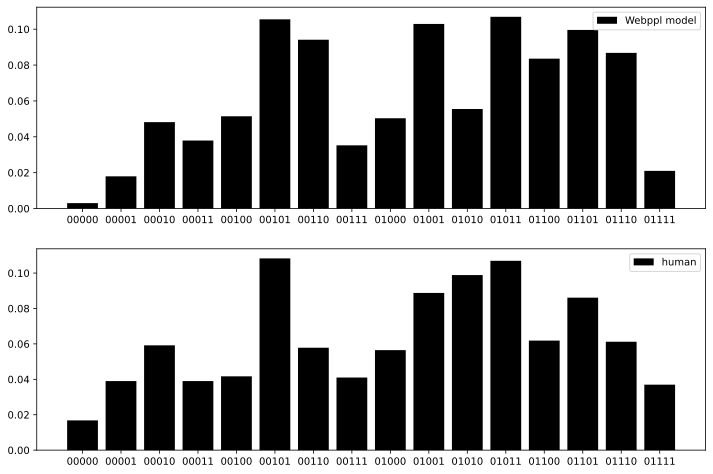

In [48]:
fig, axs = plt.subplots(2, figsize=(12, 8))
# fig.suptitle('Vertically stacked subplots')

axs[0].bar(seq5s, model_webppl_dist, color='black', label='Webppl model')
axs[0].set_label("model")
# axs[0].set_title("bayesian model 5-length subsequence distribution")

axs[0].legend()

axs[1].bar(seq5s, human_counts, color='black', label='human')
# axs[1].set_title("human 5-length subsequence distribution")

axs[1].legend()


corr = np.corrcoef(np.vstack((model_webppl_dist, human_counts)))[0,1]
print('r^2=',corr)

plt.savefig("model_5length.png")


In [20]:
def generate_random_seq (n):
    return "".join(np.random.choice(['H','T'], size=n))

HHTTHTTHHHTTHTHHTHTTHHTT
HHHHHTHTTTTTHTHHTTHTHHTTHHHHHHHTHTHHHHHH


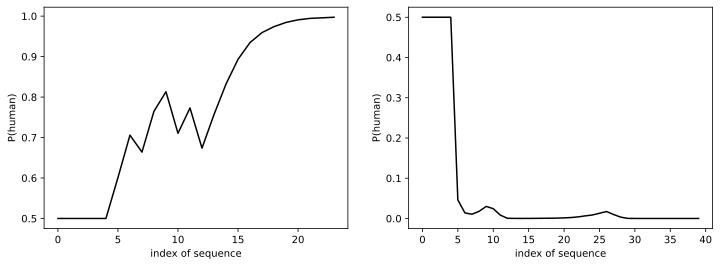

In [77]:
fig, axs = plt.subplots(1,2, figsize=(12, 4))


human_seq = human_data[1]
print(human_seq)
p_over_time = [infer_probability(human_seq[:i], model_webppl_dist) for i in range(len(human_seq))]
axs[0].plot(p_over_time, color='black', label='human sequence')
axs[0].set_ylabel('P(human)')
axs[0].set_xlabel('index of sequence')

random_seq = generate_random_seq(40)
print(random_seq)
p_over_time = [infer_probability(random_seq[:i], model_webppl_dist) for i in range(len(random_seq))]
axs[1].plot(p_over_time, color='black', label='random sequence')
axs[1].set_ylabel('P(human)')
axs[1].set_xlabel('index of sequence')

plt.savefig('p_over_time.png')

THHHTTHHHHHHHTHTTTHHTTHTHHHHTHTHHHHTTTTH


Text(0.5, 0, 'index of sequence')

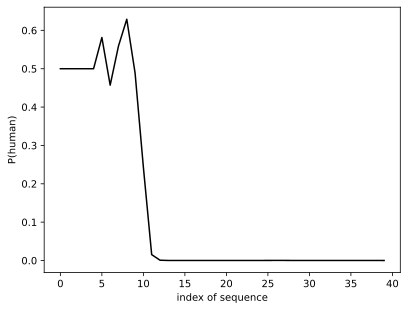

0.7472


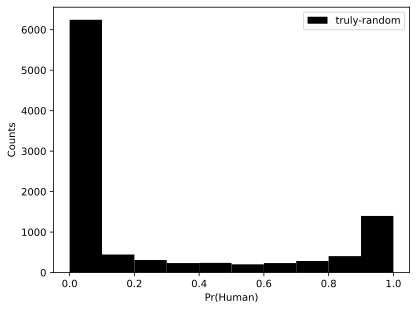

In [57]:
random_probs = [infer_probability(generate_random_seq(25), model_webppl_dist) for i in range(10000)]
_ = plt.hist(random_probs, color='black', label='truly-random')
# plt.yscale('log')
# plt.title("Distribution of Infered Human-likelihoods on Truly-random Sequences")
plt.xlabel("Pr(Human)")
plt.ylabel("Counts")
plt.legend()
plt.savefig("dist_random.png")

print(sum(np.array(random_probs) < .5) / len(random_probs))

0.6338028169014085


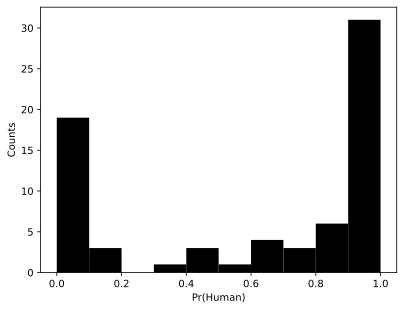

In [60]:
human_probs = [infer_probability(d, model_webppl_dist) for d in human_data]
_ = plt.hist(human_probs, color='black', label='human-generated')
# plt.yscale('log')
# plt.title("Distribution of Infered Human-likelihoods on Human-generated Sequences")
plt.xlabel("Pr(Human)")
plt.ylabel("Counts")
label='truly-random'
plt.savefig("dist_human.png")

print(sum(np.array(human_probs) >= .5) / len(human_probs))

In [53]:
r = ['THHTHHTHTTHTHHTHTHTHHHHTT', 'HHHHTHHHTHTTTHTTTTHHTTHTH', 'HTHHTTHTHHHTHHHHHHHTTTTTT', 'HTTHHHTTTHTHTTHHTTHHTTTHT', 'HTTTTTTTHTHHHHTTTHHTHHTHH']
h = ['HTHHTHHHTTTTHTTHHTTHHHHTT', 'HHTHTHTTHTTTHTHHHHHTHTTTT', 'THHTHHTHTHHTTTTTTTHHTHTTT', 'HTTHTHHTTTHTTTHTHHTHTTHTT', 'HTTHTTHHHTHTHHHHTHTTTTTHH']

print([round(infer_probability(d, model_webppl_dist), 3) for d in r])
print([round(infer_probability(d, model_webppl_dist), 3) for d in h])

[0.95, 0.11, 0.0, 0.914, 0.0]
[0.015, 0.027, 0.0, 0.995, 0.002]
